##**Cloth Company Problem**

In [8]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [222]:
cloth=pd.read_csv('Company_Data (1).csv')
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [223]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [224]:
cloth.duplicated().sum()

0

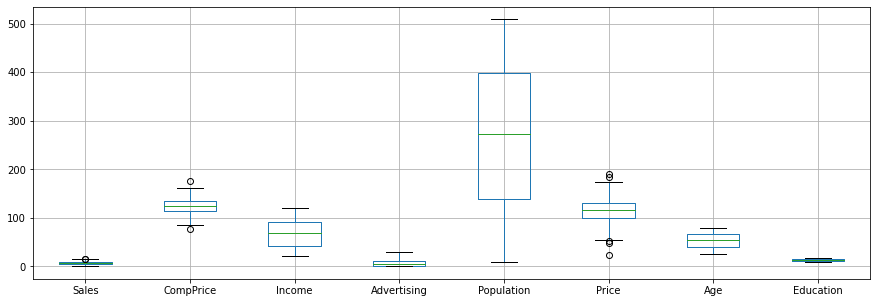

In [225]:
cloth.boxplot(figsize=(15,5))

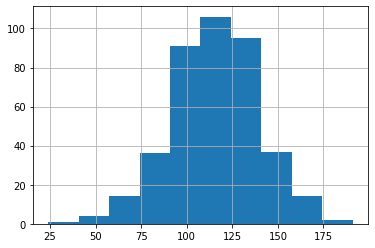

In [226]:
cloth['Price'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ec0b01970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ec0b15070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ec0b014c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ec0b15730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ec0b15a00>],
 'means': []}

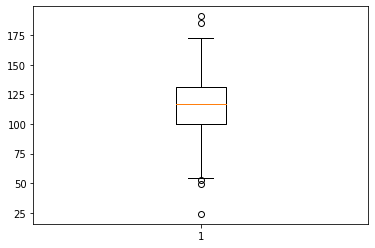

In [227]:
plt.boxplot(cloth['Price'])

In [228]:
#cloth=cloth.drop(cloth[cloth['Price']<50].index,axis=0)

In [229]:
#cloth=cloth.drop(cloth[cloth['Price']>170].index,axis=0)

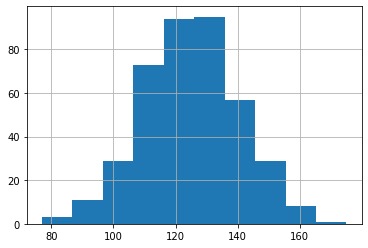

In [230]:
cloth['CompPrice'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8ec0a4d250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8ec0a4d910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8ec0a40eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8ec0a4dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8ec0a59310>],
 'means': []}

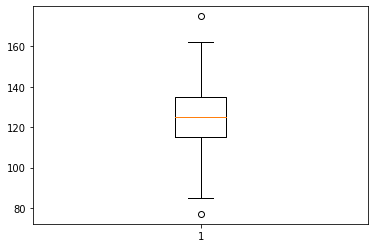

In [231]:
plt.boxplot(cloth['CompPrice'])

In [232]:
#cloth=cloth.drop(cloth[cloth['CompPrice']>160].index,axis=0)

In [233]:
cloth=pd.get_dummies(cloth,columns=['ShelveLoc','Urban','US'])
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [234]:
cloth.shape

(400, 15)

In [235]:
cloth.insert(15,'sales_cat','')
cloth

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales_cat
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,


In [236]:
cloth['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [237]:
for i in range (0,len(cloth['Sales'])):
  if cloth['Sales'][i]<=6:
    cloth['sales_cat'][i]='bad'
  else:
    cloth['sales_cat'][i]='good'

<ipython-input-237-44b668ce758c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloth['sales_cat'][i]='good'
<ipython-input-237-44b668ce758c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloth['sales_cat'][i]='bad'


In [238]:
label_encoder=preprocessing.LabelEncoder()
cloth['sales_cat']=label_encoder.fit_transform(cloth['sales_cat'])
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales_cat
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0


In [239]:
cloth=cloth.drop('Sales',axis=1)

In [240]:
cloth.shape

(400, 15)

In [241]:
import numpy as np
X=cloth.iloc[:,:-1]
Y=cloth.iloc[:,14]

In [242]:
num_trees=100
max_features=5
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [243]:
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.82


In [244]:
results

array([0.8  , 0.825, 0.8  , 0.8  , 0.9  , 0.825, 0.925, 0.85 , 0.775,
       0.7  ])

#**Fraud Check**

In [247]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [248]:
frd=pd.read_csv('Fraud_check.csv')
frd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [249]:
frd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [250]:
frd.duplicated().sum()

0

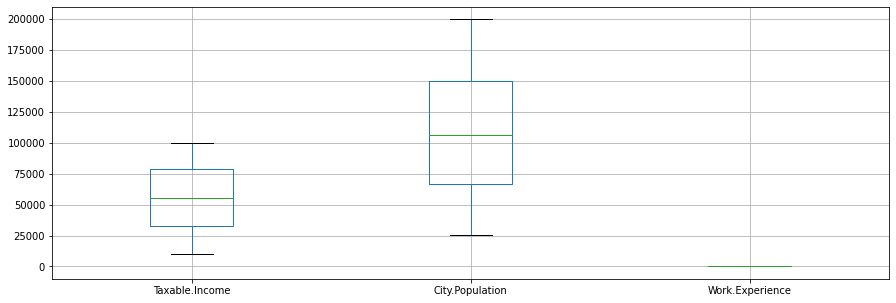

In [251]:
frd.boxplot(figsize=(15,5))

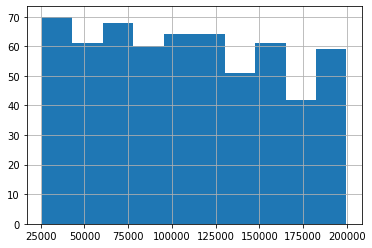

In [253]:
frd['City.Population'].hist()

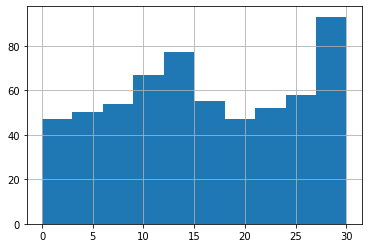

In [254]:
frd['Work.Experience'].hist()

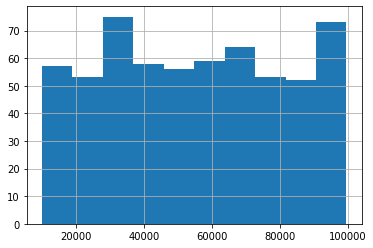

In [255]:
frd['Taxable.Income'].hist()

In [256]:
frd.insert(6,'fraud_cat','')
frd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_cat
0,NO,Single,68833,50047,10,YES,
1,YES,Divorced,33700,134075,18,YES,
2,NO,Married,36925,160205,30,YES,
3,YES,Single,50190,193264,15,YES,
4,NO,Married,81002,27533,28,NO,


In [257]:
for i in range (0,len(frd['Taxable.Income'])):
  if frd['Taxable.Income'][i]<=30000:
    frd['fraud_cat'][i]='Risky'
  else:
    frd['fraud_cat'][i]='Good'

<ipython-input-257-45cacc4cd3a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frd['fraud_cat'][i]='Good'
<ipython-input-257-45cacc4cd3a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frd['fraud_cat'][i]='Risky'


In [258]:
label_encoder=preprocessing.LabelEncoder()
frd['Undergrad']=label_encoder.fit_transform(frd['Undergrad'])
frd['Marital.Status']=label_encoder.fit_transform(frd['Marital.Status'])
frd['Urban']=label_encoder.fit_transform(frd['Urban'])
frd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_cat
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [259]:
frd['fraud_cat']=label_encoder.fit_transform(frd['fraud_cat'])
frd.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud_cat
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [260]:
frd.shape

(600, 7)

In [261]:
x=frd.iloc[:,:-1]
y=frd['fraud_cat']

In [262]:
num_trees=100
max_features=5
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [263]:
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.9983333333333334


In [264]:
results

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98333333, 1.        , 1.        , 1.        , 1.        ])